In [ ]:
import skdim
import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import stream2 as st2

sc.pp.neighbors(adata_reordered)
sc.tl.leiden(adata_reordered,resolution=3)
sc.pl.umap(adata_reordered,color='leiden')
stream2.tl.find_disconnected_components(adata_reordered)

    
leiden_lid = []
for c in np.unique(adata_reordered.obs['leiden']):
    leiden_lid.append(smooth_lid2[adata_reordered.obs['leiden']==c].mean())
leiden_lid=np.array(leiden_lid)
    
A_paga=adata_reordered.uns['paga']['connectivities']
plt.hist(A_paga.toarray().flatten());plt.show()
#A_paga[A_paga<.2]=0.1
#A_paga.eliminate_zeros()

cp = skdim.cluster.CutPursuit(A_paga,mode='l0',loss=1,edge_weights=.1).fit(leiden_lid.astype('float32'))

leiden_components = adata_reordered.obs['leiden'].astype(int)
for c in np.unique(cp.components_):
    leiden_components[np.isin(leiden_components,np.where(cp.components_==c)[0])] = c
plt.scatter(*X_umap[:2],c=leiden_components)

In [201]:
a = sc.read('../data/Nestorowa_2016/results/Nestorowa_preproc.h5ad')

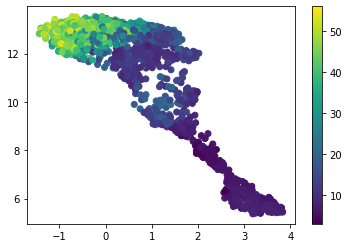

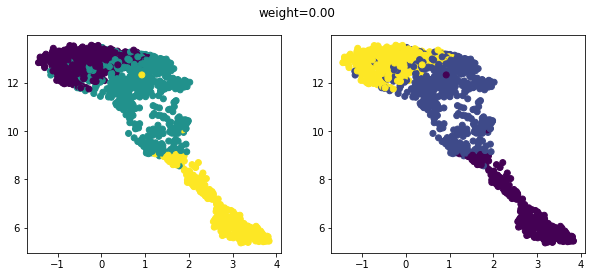

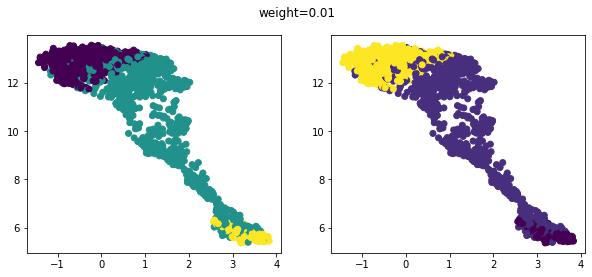

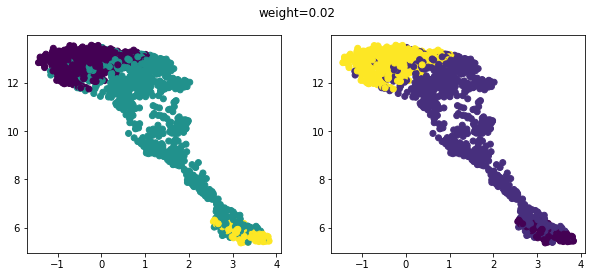

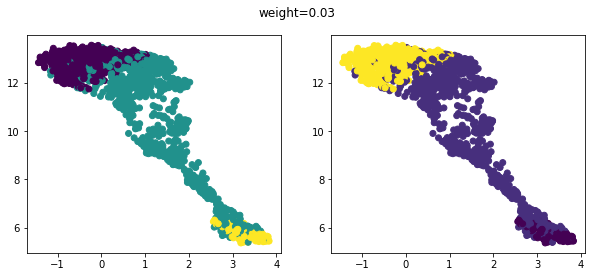

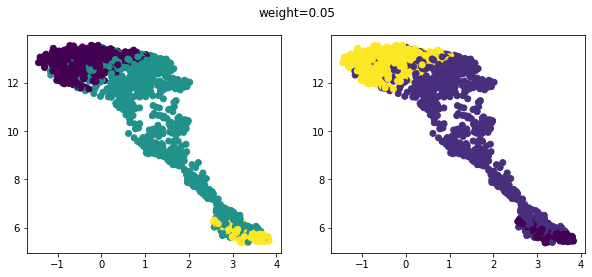

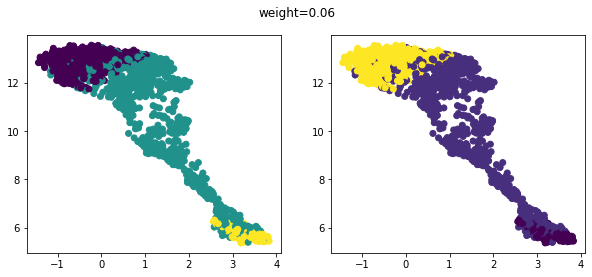

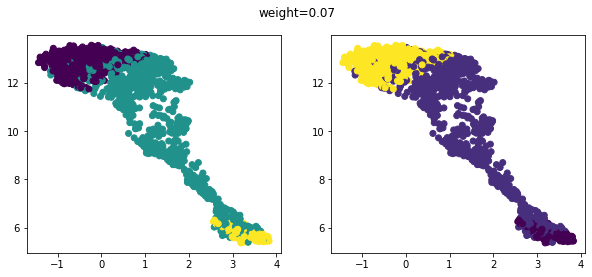

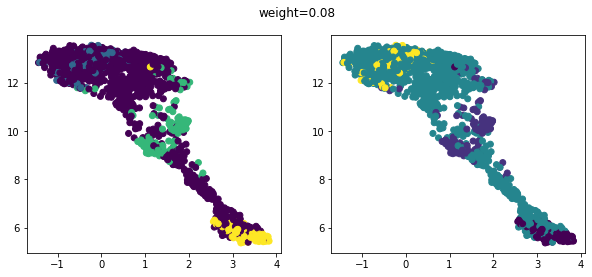

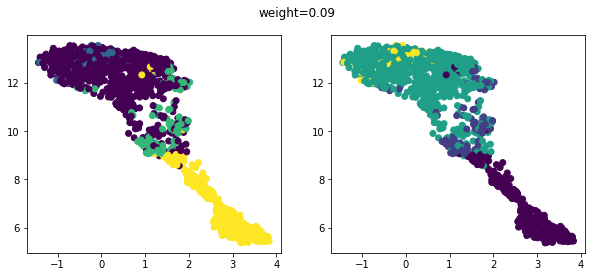

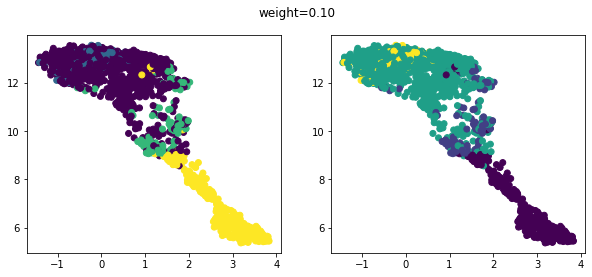

In [40]:
A = skdim.get_nn(X_pca,k=5,sparse=True)

plt.scatter(*X_umap[:2],c=lid2);plt.colorbar();plt.show()
for i in np.linspace(.001,.1,10):

    cp = skdim.cluster.CutPursuit(A,mode='l0',loss=1,edge_weights=i,min_comp_weight=100).fit(lid2.astype('float32'))
    
    f,ax=plt.subplots(1,2,figsize=(10,4))
    plt.suptitle(f'weight={i:.2f}')
    ax[0].scatter(*X_umap[:2],c=cp.components_)
    ax[1].scatter(*X_umap[:2],c=cp.components_values_[:,cp.components_].flat)
    plt.show()

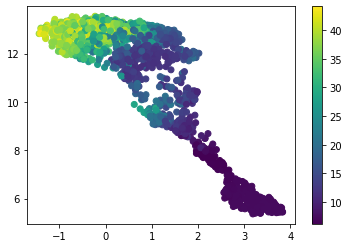

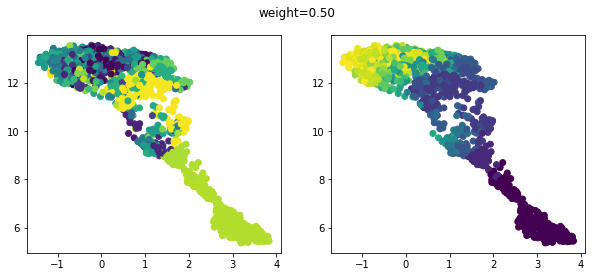

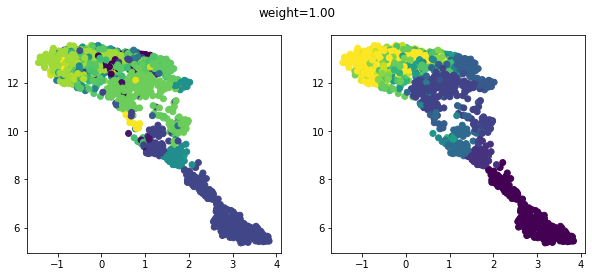

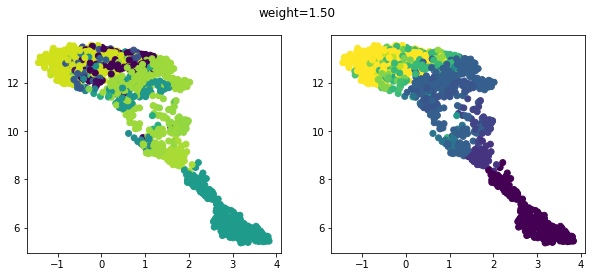

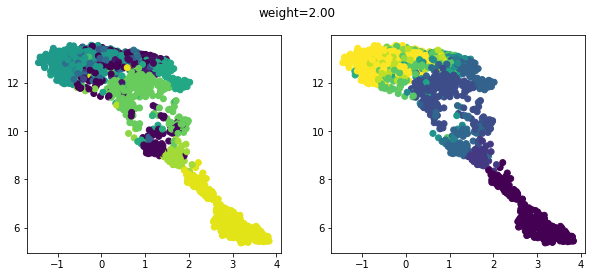

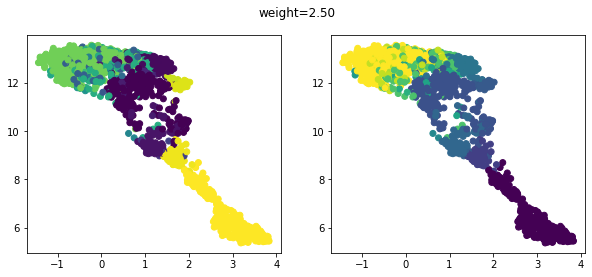

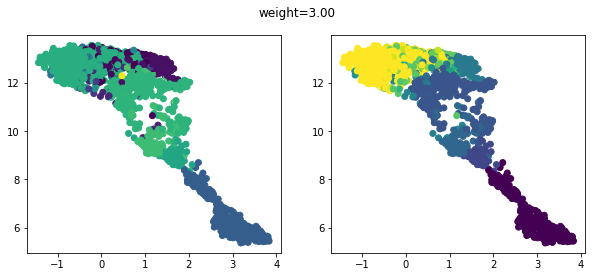

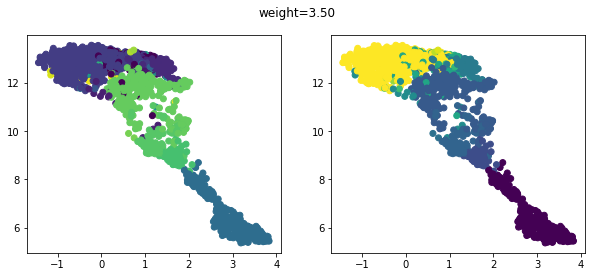

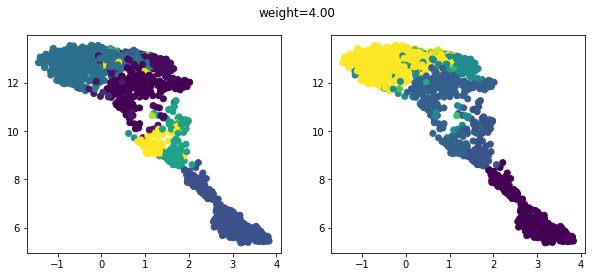

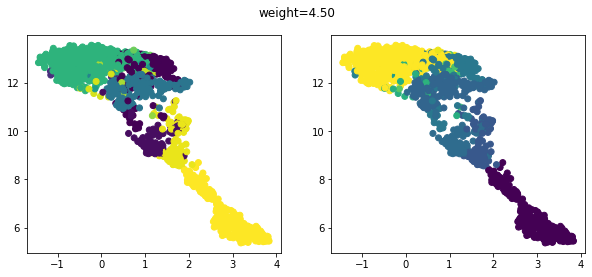

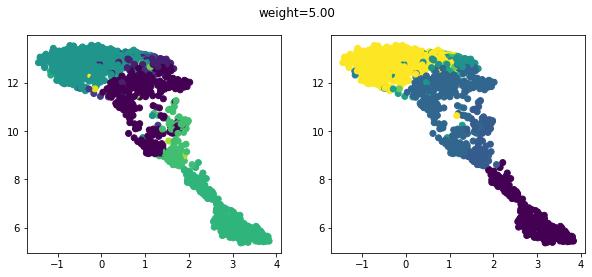

In [52]:
A = skdim.get_nn(X_pca,k=5,sparse=True)

plt.scatter(*X_umap[:2],c=smooth_lid2);plt.colorbar();plt.show()
for i in np.linspace(.5,5,10):

    cp = skdim.cluster.CutPursuit(A,mode='l1',loss=1,edge_weights=i,min_comp_weight=100).fit(smooth_lid2.astype('float32'))
    
    f,ax=plt.subplots(1,2,figsize=(10,4))
    plt.suptitle(f'weight={i:.2f}')
    ax[0].scatter(*X_umap[:2],c=cp.components_)
    ax[1].scatter(*X_umap[:2],c=cp.components_values_[cp.components_].flat)
    plt.show()

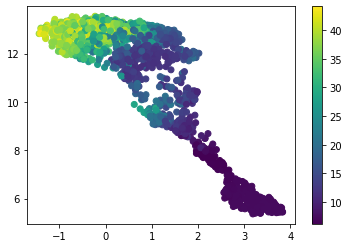

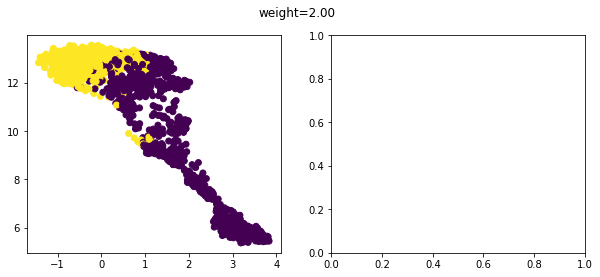

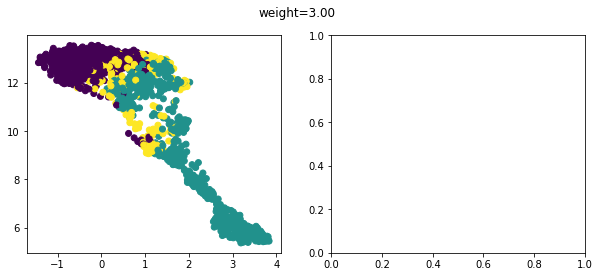

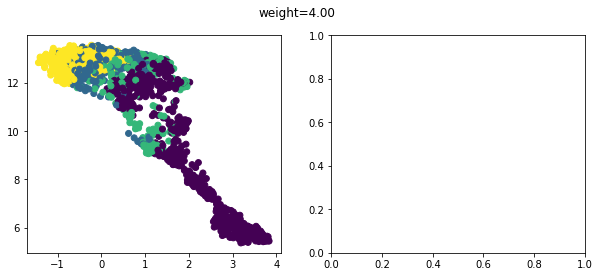

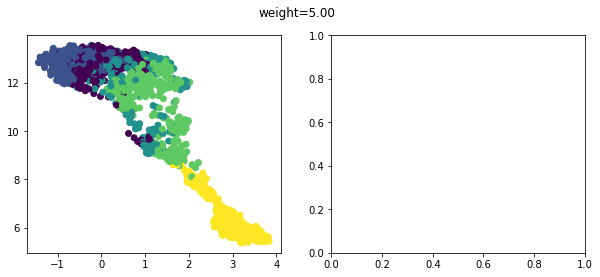

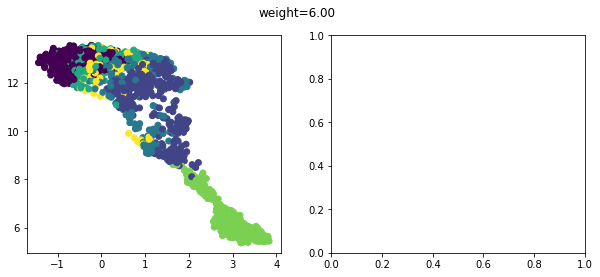

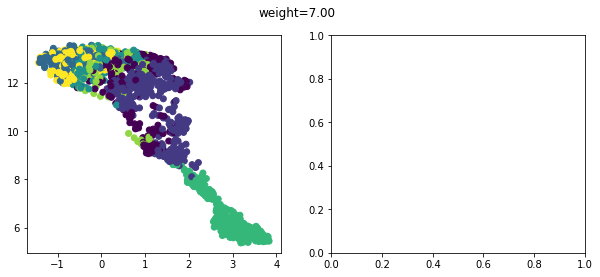

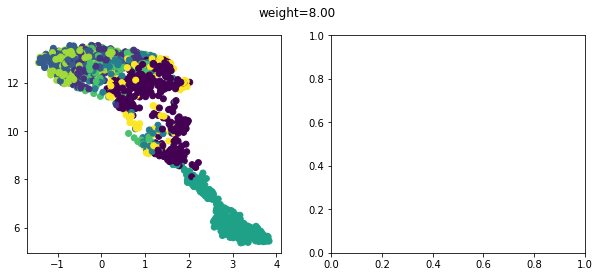

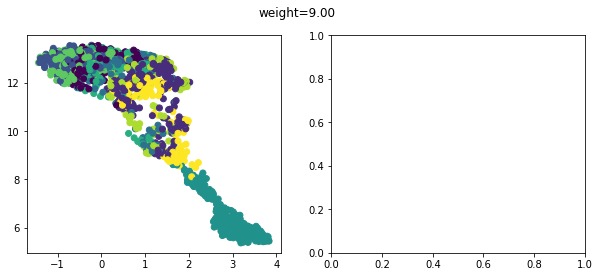

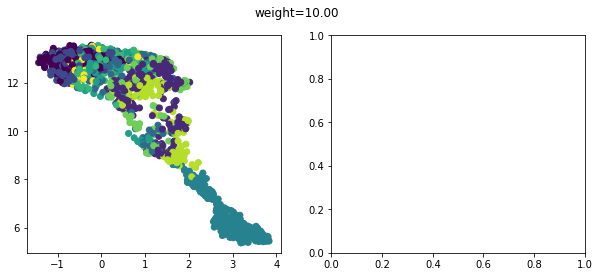

In [70]:
import skdim
import matplotlib.pyplot as plt
import numpy as np
A = skdim.get_nn(X_pca,k=15,sparse=True)

plt.scatter(*X_umap[:2],c=smooth_lid2);plt.colorbar();plt.show()
for i in np.arange(2,11):

    cp =skdim.cluster.AgglomerativeClustering(n_clusters=i,
                                                  connectivity=A,
                                                  linkage='ward',
                                                  affinity='euclidean').fit(smooth_lid2)    
    f,ax=plt.subplots(1,2,figsize=(10,4))
    plt.suptitle(f'weight={i:.2f}')
    ax[0].scatter(*X_umap[:2],c=cp.labels_)
    plt.show()